### Data visualization project with uber dataset

## Imports

In [28]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Merging All 6 csv files(one for wach month) into one dataframe

In [5]:
#Merging all csv into one dataframe
path = r'C:\Users\Julio\Documents\projetos\uber_data_visualization\dataset' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [6]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


## Creating new interesting columns

In [7]:
#Converting to datetime type
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

#Creating week days, month days, hours, and months columns 
df['DayWeekNum'] = df['Date/Time'].dt.dayofweek
df['DayWeek'] = df['Date/Time'].dt.day_name()
df['DayMonth'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour
df['Month'] = df['Date/Time'].dt.month

## New df

In [8]:
df.head()

,Date/Time,Lat,Lon,Base,DayWeekNum,DayWeek,DayMonth,Hour,Month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0,4
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0,4
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0,4


In [9]:
df.tail()

,Date/Time,Lat,Lon,Base,DayWeekNum,DayWeek,DayMonth,Hour,Month
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,1,Tuesday,30,22,9
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,1,Tuesday,30,22,9
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,1,Tuesday,30,22,9
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,1,Tuesday,30,22,9
4534326,2014-09-30 22:58:00,40.7140,-73.9496,B02764,1,Tuesday,30,22,9


## Plotting all interesting columns and relationships with num of trips

Text(0, 0.5, 'Number of Uber trips(in milions)')

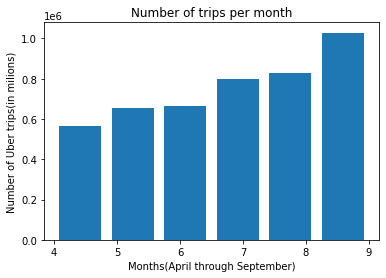

In [37]:
#Plotting number of trips per month
plt.hist(df['Month'], bins=6, rwidth=.8)
plt.title('Number of trips per month')
plt.xlabel('Months(April through September)')
plt.ylabel('Number of Uber trips(in milions)')

Text(0, 0.5, 'Number of Uber trips')

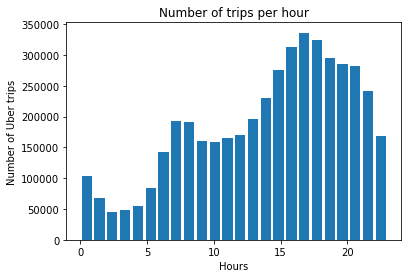

In [27]:
#Pltting number of trips per hour
plt.hist(df['Hour'], bins=24, rwidth=.8)
plt.title('Number of trips per hour')
plt.xlabel('Hours')
plt.ylabel('Number of Uber trips')

Text(0, 0.5, 'Number of Uber trips')

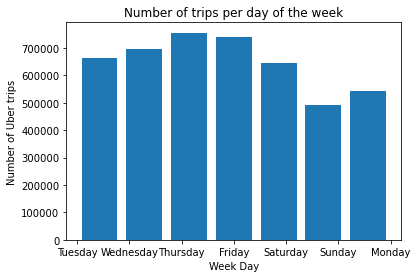

In [30]:
#Plotting number of trips per day of the week
plt.hist(df['DayWeek'], bins=7, rwidth=.8)
plt.title('Number of trips per day of the week')
plt.xlabel('Week Day')
plt.ylabel('Number of Uber trips')

Text(0, 0.5, 'Number of Uber trips')

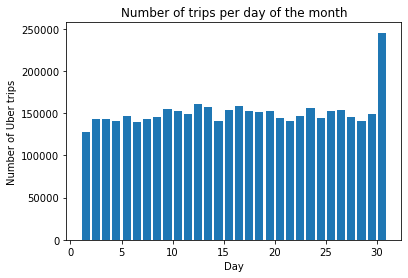

In [31]:
#Plotting number of trips per day of the month
plt.hist(df['DayMonth'], bins=30, rwidth=.8)
plt.title('Number of trips per day of the month')
plt.xlabel('Day')
plt.ylabel('Number of Uber trips')

Text(0, 0.5, 'Number of Uber trips(in millions)')

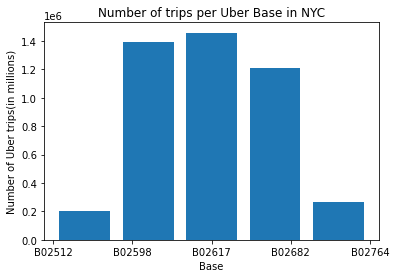

In [36]:
#Plotting number of trips per uber base
plt.hist(df['Base'], bins=5, rwidth=.8)
plt.title('Number of trips per Uber Base in NYC')
plt.xlabel('Base')
plt.ylabel('Number of Uber trips(in millions)')

## Modifying dtaframe to create heatmap

In [45]:
#grouping by day of the week and hour( to count the num of trips in each combination)
day_vs_hour_df = df.groupby('DayWeekNum Hour'.split()).size().reset_index()

In [46]:
#Transforming each hour in a column and each day into row
day_vs_hour_df = day_vs_hour_df.set_index(['DayWeekNum', 'Hour']).unstack(['Hour'])

In [47]:
# transformed df
day_vs_hour_df.head()

0                                                             \
Hour           0     1     2     3     4      5      6      7      8      9    
DayWeekNum                                                                     
0            6436  3737  2938  6232  9640  15032  23746  31159  29265  22197   
1            6237  3509  2571  4494  7548  14241  26872  36599  33934  25023   
2            7644  4324  3141  4855  7511  13794  26943  36495  33826  25635   
3            9293  5290  3719  5637  8505  14169  27065  37038  35431  27812   
4           13716  8163  5350  6930  8806  13450  23412  32061  31509  25230   

            ...                                                          \
Hour        ...     14     15     16     17     18     19     20     21   
DayWeekNum  ...                                                           
0           ...  28157  32744  38770  42023  37000  34159  32849  28925   
1           ...  34846  41338  48667  55500  50186  44789  44661  39913   
2           ...  35148  43388  50684  55637  52732  47017  47772  44553   
3           ...  36699  44442  50560  56704  55825  51907  51990  51953   
4           ...  36206  43673  48169  51961  54762  49595  43542  48323   

                          
Hour           22     23  
DayWeekNum                
0           20158  11811  
1           27712  14869  
2           32868  18146  
3           44194  27764  
4           49409  41260  

[5 rows x 24 columns]

## Heatmap representing relationship between numbe rof trips(color), hour and day of the week(x and y-axis)

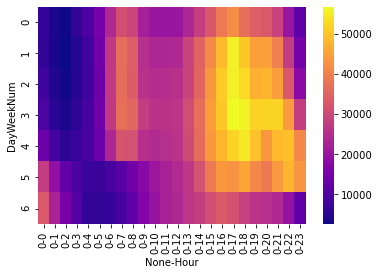

In [49]:
sns.heatmap(day_vs_hour_df, cmap='plasma')

## Plotting coordinates of trips in graph, highligting the NYC map 

(40.5, 41.0)

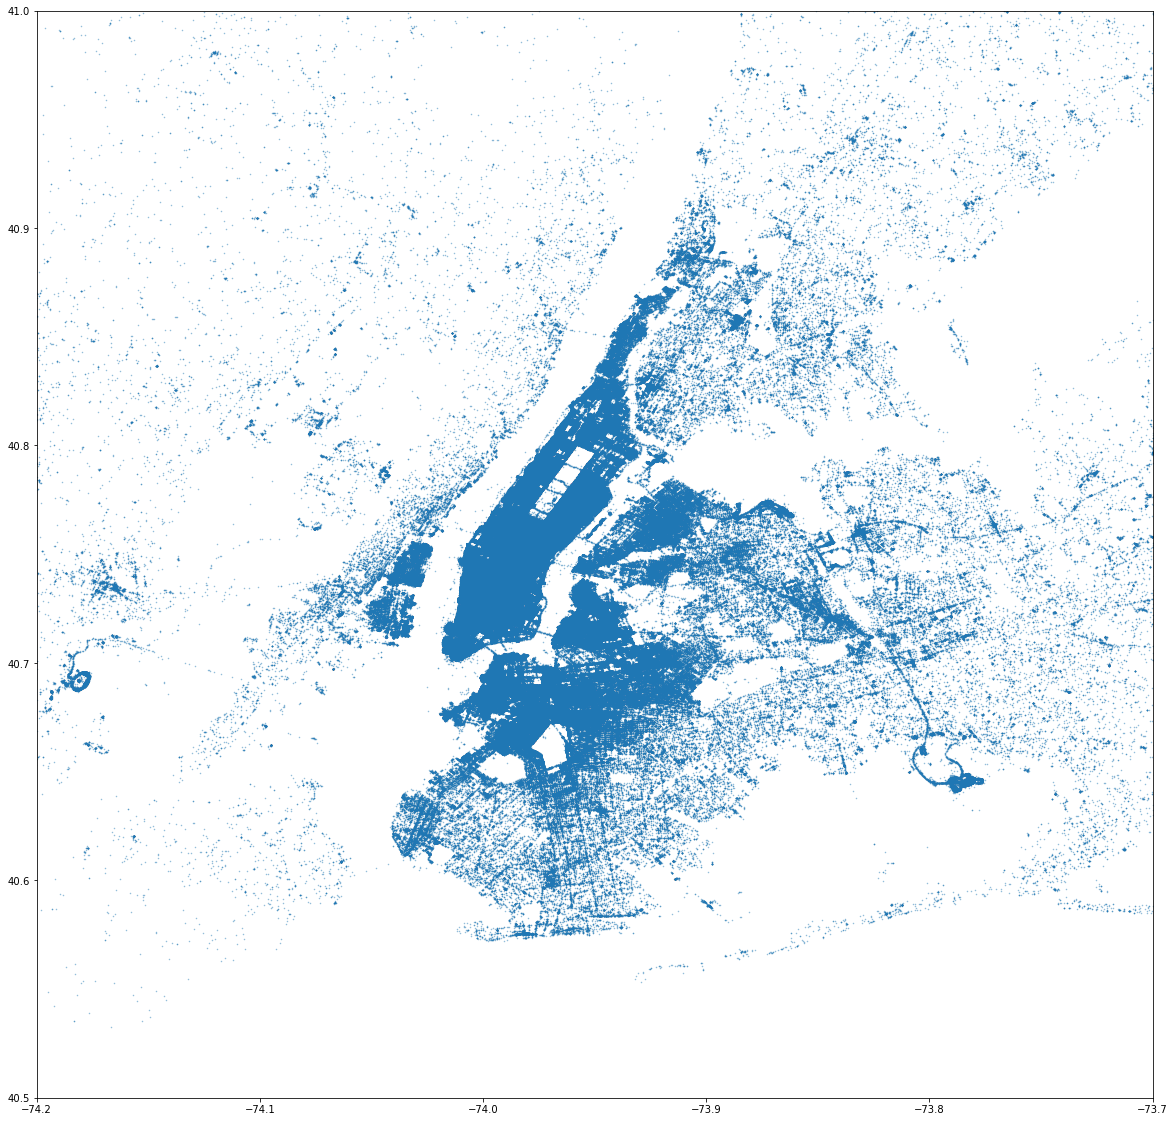

In [24]:
#defining size of figure for more detail
plt.figure(figsize=(20,20))

#plotting points using latitude and longitude
plt.plot(df['Lon'], df['Lat'], '.', ms=1, alpha=.5)

#defining latitude and longitude limits to see city better
plt.xlim(-74.2,-73.7)
plt.ylim(40.5,41)